# Problem Set 1: Linear Regression

Total: 185 points.

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file to your computer (use "Raw" link on gist\github), run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

### 1. Numpy Tutorial
**1\.1 [5pt]**
Modify the cell below to return a 5x5 matrix of ones. Put some code there and press `Ctrl+Enter` to execute contents of the cell. You should see something like the output above. [[1]](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html#arrays-creation) [[2]](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-creation.html#routines-array-creation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print(np.ones((5, 5)))
# raise NotImplementedError("Replace this raise statement with the code "
#                           "that prints 5x5 matrix of ones")

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


**1.2 [5pt]** 
Let A be a 10x10 matrix and x be a 10-element column vector. Your friend writes the following code. How would you vectorize this code to run without any for loops? Compare execution speed for different values of `n` with [`%timeit`](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit).

In [2]:
n = 10
def compute_something(A, x):
    v = np.zeros((n, 1))
    for i in range(n):
        for j in range(n):
            v[i] += A[i, j] * x[j]
    return v
            
A = np.random.rand(n, n)
x = np.random.rand(n, 1)
print(compute_something(A, x))

[[2.54956495]
 [1.48702369]
 [1.86400925]
 [1.22613428]
 [2.15877375]
 [2.66612132]
 [2.46252171]
 [2.1766439 ]
 [1.81166383]
 [1.2941777 ]]


In [3]:
def vectorized(A, x):
    return A @ x
    # raise NotImplementedError('Put your vectorized code here!')

print(vectorized(A, x))
assert np.max(abs(vectorized(A, x) - compute_something(A, x))) < 1e-3

[[2.54956495]
 [1.48702369]
 [1.86400925]
 [1.22613428]
 [2.15877375]
 [2.66612132]
 [2.46252171]
 [2.1766439 ]
 [1.81166383]
 [1.2941777 ]]


In [4]:
for n in [5, 10, 100, 500]:
    A = np.random.rand(n, n)
    x = np.random.rand(n, 1)
    %timeit -n 5 compute_something(A, x)
    %timeit -n 5 vectorized(A, x)
    # raise NotImplementedError('Put your timeit code here!')
    print('---')

5 loops, best of 3: 133 µs per loop
The slowest run took 5.65 times longer than the fastest. This could mean that an intermediate result is being cached.
5 loops, best of 3: 1.72 µs per loop
---
5 loops, best of 3: 432 µs per loop
The slowest run took 4.17 times longer than the fastest. This could mean that an intermediate result is being cached.
5 loops, best of 3: 1.53 µs per loop
---
5 loops, best of 3: 32.4 ms per loop
The slowest run took 7.53 times longer than the fastest. This could mean that an intermediate result is being cached.
5 loops, best of 3: 2.3 µs per loop
---
5 loops, best of 3: 758 ms per loop
The slowest run took 5.27 times longer than the fastest. This could mean that an intermediate result is being cached.
5 loops, best of 3: 11.8 µs per loop
---


### 2. Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. The file ex1data.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

**2.1 [10pt]** Get a plot similar to above
: [[1]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) [[2]](https://matplotlib.org/api/pyplot_api.html?highlight=xlim#matplotlib.pyplot.xlim) [[3]](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20xlabel#matplotlib.pyplot.xlabel)

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.

(97, 1) (97, 1) 97
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]
 [8.3829]
 [7.4764]
 [8.5781]
 [6.4862]
 [5.0546]] 
 [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]
 [11.886 ]
 [ 4.3483]
 [12.    ]
 [ 6.5987]
 [ 3.8166]]


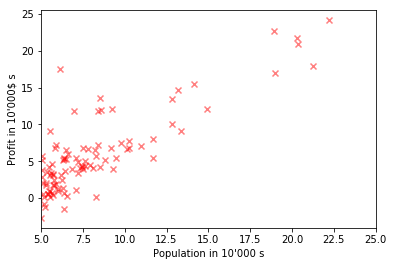

In [5]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X, y = data[:, 0, np.newaxis], data[:, 1, np.newaxis]
n = data.shape[0]
print(X.shape, y.shape, n)
print(X[:10], '\n', y[:10])

plt.scatter(X, y, marker='x', color='r', alpha=0.5)
plt.xlim(5, 25)
plt.xlabel('Population in 10\'000 s')
plt.ylabel('Profit in 10\'000$ s')

# NotImplementedError('Put the visualziation code here.')

plt.show()

**2.2** Gradient Descent

In this part, you will fit the linear regression parameter $\theta$ to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function
$$ J(\theta) = \frac{1}{2m} \sum_{i = 1}^{m} \big(h(x^{(i)}; \theta) - y^{(i)}\big)^2$$
where the hypothesis $h(x;\theta)$ is given by the linear model ($x'$ has an additional fake feature always equal to '`1`')
$$ h(x;\theta) = \theta^T x' = \theta_0 + \theta_1 x$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost J(θ). One way to do this is to use the gradient descent
algorithm for single element. In gradient descent algorithm, each iteration performs the update for a single sample.

$$ \theta_j^{(k+1)} = \theta_j^{(k)} - \eta \frac{1}{m} \big(h(x^{(i)}; \theta) - y^{(i)}\big) x^{(i)}_j $$
With each step of gradient descent, your parameter $\theta_j$ come closer to the optimal values
that will achieve the lowest cost J(θ).

**2.2.1** **[5pt]** Where does this update rule comes from?

we need to calculate $\frac{\partial J(\theta)}{\partial \theta_j}$ to get the gradient for each $\theta_j$
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{2m}\times \frac{\partial J(\theta)}{\partial h(x;\theta)}\times \frac{\partial h(x;\theta)}{\partial \theta_j} = \frac{1}{2m}\times 2 \big(h(x^{(i)}; \theta) - y^{(i)}\big) \times x_j^{(i)} = \frac{1}{m} \big(h(x^{(i)}; \theta) - y^{(i)}\big) x^{(i)}_j$$
We also need to choose a learning rate $\eta$ to determine the update speed for each step. Then we can update $\theta_j$ iteratively to reduce the loss function $J(\theta)$ by
$$ \theta_j^{(k+1)} = \theta_j^{(k)} - \eta \frac{1}{m} \big(h(x^{(i)}; \theta) - y^{(i)}\big) x^{(i)}_j $$

**2.2.2** **[30pt]** Cost Implementation

As you perform gradient descent to learn to minimize the cost function, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In the following lines, we add another dimension to our data to accommodate the intercept term and compute the prediction and the loss. As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set. In order to get $x'$ [add a column](https://docs.scipy.org/doc/numpy/reference/generated/numpy.insert.html) of ones to the data matrix `X`.

You should expect to see a cost of approximately 33.04.

In [6]:
# assertions below are true only for this 
# specific case and are given to ease debugging!

def add_column(X):
    assert len(X.shape) == 2 and X.shape[1] == 1
    
    # raise NotImplementedError("Insert a column of ones to the left side of the matrix")
    return np.insert(X, 0, 1, axis=1)

def predict(X, theta):
    """ Computes h(x; theta) """
    assert len(X.shape) == 2 and X.shape[1] == 1
    assert theta.shape == (2, 1)
    
    X_prime = add_column(X)
    pred = X_prime @ theta
    # raise NotImplementedError("Compute the regression predictions")
    return pred

def loss(X, y, theta):
    assert X.shape == (n, 1)
    assert y.shape == (n, 1)
    assert theta.shape == (2, 1)
    
    X_prime = add_column(X)
    assert X_prime.shape == (n, 2)
    
    # raise NotImplementedError("Compute the model loss; use the predict() function")
    loss = ((predict(X, theta) - y)**2).mean()/2
    return loss

theta_init = np.zeros((2, 1))
print(loss(X, y, theta_init))

32.072733877455676


**2.2.3** **[40pt]** GD Implementation

Next, you will implement gradient descent. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost is parameterized by the vector $\theta$ not X and y. That is, we minimize the value of by changing the values of the vector $\theta$, not by changing X or y.

A good way to verify that gradient descent is working correctly is to look at the value of  and check that it is decreasing with each step. Your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.  Other way of making sure your gradient estimate is correct is to check it againts a [finite difference](https://en.wikipedia.org/wiki/Finite_difference) approximation.

We also initialize the initial parameters to 0 and the learning rate alpha to `0.01`. 

max grad comp error 8.153337067717814e-06
estimated theta value [-3.63029144  1.16636235]
resulting loss 4.483388256587726


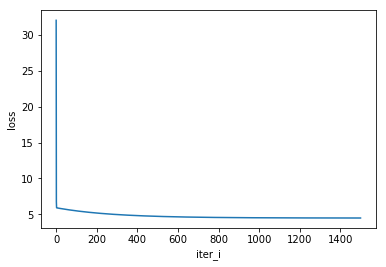

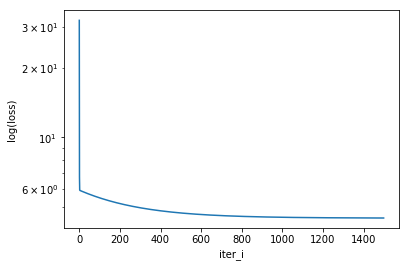

In [7]:
import scipy.optimize
from functools import partial

def loss_gradient(X, y, theta):
    X_prime = add_column(X)
    loss_grad = ((predict(X, theta) - y)*X_prime).mean(axis=0)[:, np.newaxis]
#     raise NotImplementedError("Compute the model loss gradient; "
#                               "use the predict() function; "
#                               "this also must be vectorized!")
    return loss_grad
    
assert loss_gradient(X, y, theta_init).shape == (2, 1)

def finite_diff_grad_check(f, grad, points, eps=1e-10):
    errs = []
    for point in points:
        point_errs = []
        grad_func_val = grad(point)
        for dim_i in range(point.shape[0]):
            diff_v = np.zeros_like(point)
            diff_v[dim_i] = eps
            dim_grad = (f(point+diff_v) - f(point-diff_v))/(2*eps)
            point_errs.append(abs(dim_grad - grad_func_val[dim_i]))
        errs.append(point_errs)
    return errs

test_points = [np.random.rand(2, 1) for _ in range(10)]
finite_diff_errs = finite_diff_grad_check(
    partial(loss, X, y), partial(loss_gradient, X, y), test_points
)

print('max grad comp error', np.max(finite_diff_errs))
assert np.max(finite_diff_errs) < 1e-3, "grad computation error is too large"

def run_gd(loss, loss_gradient, X, y, theta_init, lr=0.01, n_iter=1500):
    theta_current = theta_init.copy()
    loss_values = []
    theta_values = []
    
    for i in range(n_iter):
        loss_value = loss(X, y, theta_current)
        theta_current = theta_current - lr*loss_gradient(X, y, theta_current)
        loss_values.append(loss_value)
        theta_values.append(theta_current)
        
    return theta_current, loss_values, theta_values

result = run_gd(loss, loss_gradient, X, y, theta_init)
theta_est, loss_values, theta_values = result

print('estimated theta value', theta_est.ravel())
print('resulting loss', loss(X, y, theta_est))
plt.ylabel('loss')
plt.xlabel('iter_i')
plt.plot(loss_values)
plt.show()

plt.ylabel('log(loss)')
plt.xlabel('iter_i')
plt.semilogy(loss_values)
plt.show()

**2.2.4** **[10pt]** After you are finished, use your final parameters to plot the linear fit. The result should look something like on the figure below.

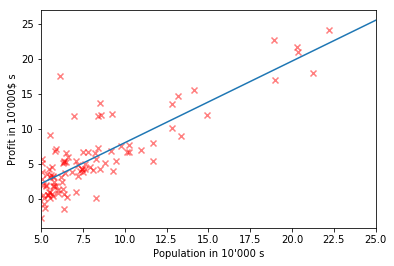

In [8]:
plt.scatter(X, y, marker='x', color='r', alpha=0.5)
x_start, x_end = 5, 25
plt.xlim(x_start, x_end)
X_test = np.array([[5], [25]])
y_test = predict(X_test, theta_est)
plt.plot(X_test, y_test)
plt.xlabel('Population in 10\'000 s')
plt.ylabel('Profit in 10\'000$ s')
plt.show()

Now use your final values for $\theta$ and the `predict()` function to make predictions on profits in areas of 35,000 and 70,000 people.

In [9]:
print(predict(np.array([[35000], [70000]]), theta_est))

[[40819.05197031]
 [81641.73423205]]


To understand the cost functionbetter, you will now plot the cost over a 2-dimensional grid of and  values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

(100, 100) (100, 100) (100, 100)


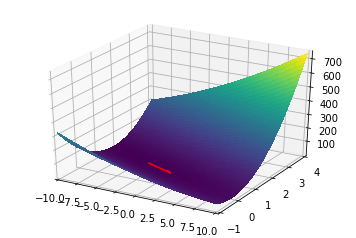

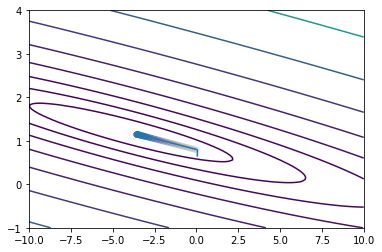

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
# scale_all = 1
# scale_x, scale_y = 20*scale_all, 5*scale_all
# limits = [(theta_est[0]-scale_x, theta_est[0]+scale_x), 
#           (theta_est[1]-scale_y, theta_est[1]+scale_y)]
limits = [(-10, 10), (-1, 4)]
space = [np.linspace(*limit, 100) for limit in limits]
theta_1_grid, theta_2_grid = np.meshgrid(*space)
theta_meshgrid = np.vstack([theta_1_grid.ravel(), theta_2_grid.ravel()])
loss_test_vals_flat = (((add_column(X) @ theta_meshgrid - y)**2).mean(axis=0)/2)
loss_test_vals_grid = loss_test_vals_flat.reshape(theta_1_grid.shape)
print(theta_1_grid.shape, theta_2_grid.shape, loss_test_vals_grid.shape)

plt.gca(projection='3d').plot_surface(theta_1_grid, theta_2_grid, 
                                      loss_test_vals_grid, cmap=cm.viridis,
                                      linewidth=0, antialiased=False)
xs, ys = np.hstack(theta_values).tolist()
zs = np.array(loss_values)
plt.gca(projection='3d').plot(xs, ys, zs, c='r')
plt.xlim(*limits[0])
plt.ylim(*limits[1])
plt.show()

plt.contour(theta_1_grid, theta_2_grid, loss_test_vals_grid, levels=np.logspace(-2, 3, 20))
plt.plot(xs, ys)
plt.scatter(xs, ys, alpha=0.005)
plt.xlim(*limits[0])
plt.ylim(*limits[1])
plt.show()

In [11]:
theta_values

[array([[0.05839135],
        [0.6532885 ]]), array([[0.06289175],
        [0.77000978]]), array([[0.05782293],
        [0.79134812]]), array([[0.05106363],
        [0.79572981]]), array([[0.04401438],
        [0.79709618]]), array([[0.03692413],
        [0.79792547]]), array([[0.02983712],
        [0.79865824]]), array([[0.02276118],
        [0.79937279]]), array([[0.0156977 ],
        [0.80008305]]), array([[0.0086469],
        [0.8007915]]), array([[0.00160879],
        [0.80149857]]), array([[-0.00541662],
        [ 0.80220436]]), array([[-0.01242938],
        [ 0.80290886]]), array([[-0.01942949],
        [ 0.8036121 ]]), array([[-0.02641699],
        [ 0.80431407]]), array([[-0.03339189],
        [ 0.80501478]]), array([[-0.04035421],
        [ 0.80571422]]), array([[-0.04730399],
        [ 0.8064124 ]]), array([[-0.05424124],
        [ 0.80710932]]), array([[-0.06116598],
        [ 0.80780498]]), array([[-0.06807824],
        [ 0.8084994 ]]), array([[-0.07497804],
        [ 0.80

### 3. Linear regression with multiple input features

**3.1** **[20pt]** Copy-paste your `add_column`, `predict`, `loss` and `loss grad` implementations from above and modify your code (if necessarily) of linear regression with one variable to support any number of features (vectorize your code.)

In [12]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X, y = data[:, :-1], data[:, -1, np.newaxis]
n = data.shape[0]
print(X.shape, y.shape, n)
print(X[:10], '\n', y[:10])

(47, 2) (47, 1) 47
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]] 
 [[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]
 [314900.]
 [198999.]
 [212000.]
 [242500.]]


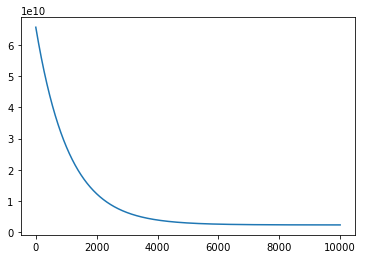

In [13]:
def add_column(X):
    """ Adds a column of ones to a matrix"""
    n_ = X.shape[0]
    return np.concatenate([X, np.ones((n_, 1))], axis=1)

def predict(X, theta):
    """ Computes h(x; theta) """
    X_prime = add_column(X)
    return X_prime @ theta

def loss(X, y, theta):
    X_prime = add_column(X)
    loss = ((predict(X, theta) - y)**2).mean()/2
    return loss

def loss_gradient(X, y, theta):
    # this also must be vectorized !
    X_prime = add_column(X)
    loss_grad = ((predict(X, theta) - y)*X_prime).mean(axis=0)[:, np.newaxis]
    return loss_grad

theta_init = np.zeros((3, 1))
result = run_gd(loss, loss_gradient, X, y, theta_init, n_iter=10000, lr=1e-10)
theta_est, loss_values, theta_values = result
plt.plot(loss_values)
plt.show()

# raise NotImplementedError("Put your multivariate regression code here")

**3.2** **[20pt]** Draw a histogam of values for the first and second feature. Why is feature normalization important? Normalize features and re-run the gradient decent.

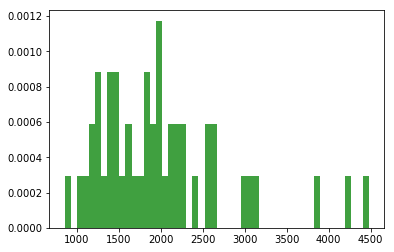

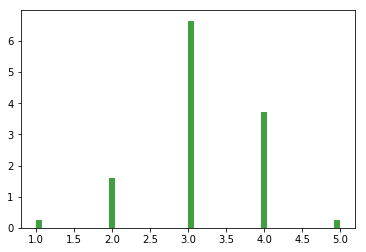

In [14]:
plt.hist(X[:, 0], 50, normed=1, facecolor='green', alpha=0.75)
plt.show()
plt.hist(X[:, 1], 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

# raise NotImplementedError("Draw histogram and run re-run gd with feature normalization")

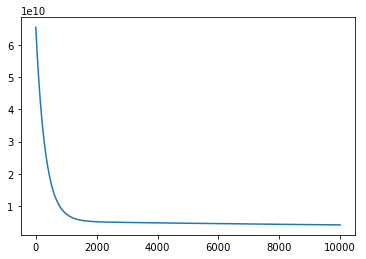

In [15]:
theta_init = np.zeros((3, 1))
X_normed = np.zeros_like(X)
X_normed[:, 0] = X[:, 0] / X[:, 0].max()
X_normed[:, 1] = X[:, 1] / X[:, 1].max()
result = run_gd(loss, loss_gradient, X_normed, y, theta_init, n_iter=10000, lr=1e-3)
theta_est, loss_values, theta_values = result

plt.plot(loss_values)
plt.show()

**3.3 [10pt]** How can we choose an appropriate learning rate? See what will happen if the learning rate is too small or too large for normalized and not normalized cases?

By choosing the best performaning hyperparameter on validation dataset. If learning rate is too small, the model will take a long time to converge to minimum loss. On the other hand, if the learning rate is too large, the loss might be oscillation and might not converge.

### 4. Written part

These problems are extremely important preparation for the quizzes. Submit solutions to each problem, along with a self-assigned grade. Give yourself full points if you think you have found the correct solution (half points for a partial solution, zero for no attempt.) You may look up definitions online but not the actual answer. Solutions will be released shortly after the due date.

**4.1 [10 pt]** Maximum Likelihood Estimate for Coin Toss

The probability distribution of a single binary variable  that takes value  with probability  is given by the Bernoulli distribution

$$ \operatorname{Bern}(x|\mu) = \mu^x (1-\mu)^{1-x}$$

For example, we can use it to model the probability of seeing ‘heads’ ($x=1$) or ‘tails’ ($x=0$) after tossing a coin, with $\mu$ being the probability of seeing ‘heads’. Suppose we have a dataset of independent coin flipu $D = \{ x^{(1)} , \dots, x^{(m)} \}$ and we would like to estimate $\mu$ using Maximum Likelihood. Recall that we can write down the likelihood function as

$$\mathcal L (x^{(i)}|\mu) = \mu^{x^{(i)}} (1-\mu)^{1-{x^{(i)}}}$$

$$ P(D|\mu) = \prod_i \mathcal L (x^{(i)}|\mu)$$

The log of the likelihood function is

$$ \ln p(D|\mu) = \sum_i x^{(i)} \ln \mu + (1-x^{(i)})\ln(1-\mu)$$

Show that the ML solution for $\mu$ is given by  $\mu_{ML} = \frac{h}{m}$  where $h$ is the total number of ‘heads’ in the dataset. Show all of your steps.


**4.2 [10 pt]** Localized linear regression

Suppose we want to estimate localized linear regression by weighting the contribution of the data points by their distance to the query point $x_q$, i.e. using the cost

$$ E(x_q) = \frac{1}{2}\sum_i^m \frac{(y^{(i)}-h(x^{(i)}|\theta))^2}{|| x^{(i)} - x_q ||^2}$$

where $\frac{1}{|| x^{(i)} - x_q ||} = w^{(i)}$ is the inverse Euclidean distance between the training point $x^{(i)}$ and query (test) point $x_q$.

Derive the modified normal equations (closed form?) for the above cost function $E(x_q)$. (Hint: first, re-write the cost function in matrix/vector notation, using a diagonal matrix to represent the weights $w^{(i)}$).


**4.3 [10 pt]** Betting on Trick Coins

A game is played with three coins in a jar: one is a normal coin, one has “heads” on both sides, one has “tails” on both sides. All coins are “fair”, i.e. have equal probability of landing on either side. Suppose one coin is picked randomly from the jar and tossed, and lands with “heads” on top. What is the probability that the bottom side is also “heads”? Show all your steps. 
